## import some module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load dataset

In [2]:
df = pd.read_csv("Penjualan_Toko.csv")
df

,Tanggal,Kategori,Produk,Jumlah Terjual,Harga Satuan (IDR),Pendapatan (IDR)
0,2025-01-01,Elektronik,Smartphone,10,2500000,25000000
1,2025-01-01,Elektronik,Laptop,5,7500000,37500000
2,2025-01-01,Rumah Tangga,Blender,8,800000,6400000
3,2025-01-02,Elektronik,Smartphone,12,2500000,30000000
4,2025-01-02,Rumah Tangga,Blender,6,800000,4800000
5,2025-01-02,Rumah Tangga,Mesin Cuci,4,3500000,14000000
6,2025-01-03,Elektronik,Laptop,6,7500000,45000000
7,2025-01-03,Rumah Tangga,Mesin Cuci,5,3500000,17500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Tanggal             8 non-null      object
 1   Kategori            8 non-null      object
 2   Produk              8 non-null      object
 3   Jumlah Terjual      8 non-null      int64 
 4   Harga Satuan (IDR)  8 non-null      int64 
 5   Pendapatan (IDR)    8 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 512.0+ bytes


## memmperbaiki format data yang kurang tepat

In [4]:
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

In [5]:
df

,Tanggal,Kategori,Produk,Jumlah Terjual,Harga Satuan (IDR),Pendapatan (IDR)
0,2025-01-01,Elektronik,Smartphone,10,2500000,25000000
1,2025-01-01,Elektronik,Laptop,5,7500000,37500000
2,2025-01-01,Rumah Tangga,Blender,8,800000,6400000
3,2025-01-02,Elektronik,Smartphone,12,2500000,30000000
4,2025-01-02,Rumah Tangga,Blender,6,800000,4800000
5,2025-01-02,Rumah Tangga,Mesin Cuci,4,3500000,14000000
6,2025-01-03,Elektronik,Laptop,6,7500000,45000000
7,2025-01-03,Rumah Tangga,Mesin Cuci,5,3500000,17500000


# soal 

## 1. Tampilkan total pendapatan untuk masing-masing kategori produk.

In [6]:
total_amount_each_product = df.groupby(["Produk"])["Pendapatan (IDR)"].sum().reset_index()

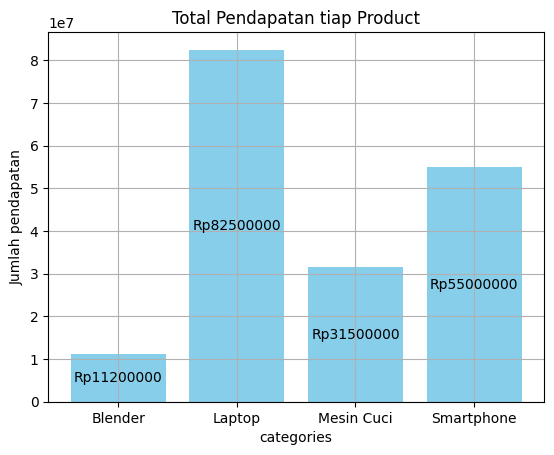

In [7]:
test = plt.bar(total_amount_each_product["Produk"], total_amount_each_product["Pendapatan (IDR)"], width=0.8, color="skyblue")
plt.ylabel("Jumlah pendapatan")
plt.xlabel("categories")
plt.title("Total Pendapatan tiap Product")

plt.grid()
plt.bar_label(test,fmt="Rp%.0f", label_type="center")
plt.show()


## 2. Tampilkan tren total pendapatan harian.

In [8]:
result = df.groupby(["Tanggal"])["Pendapatan (IDR)"].sum().reset_index()

result

,Tanggal,Pendapatan (IDR)
0,2025-01-01,68900000
1,2025-01-02,48800000
2,2025-01-03,62500000


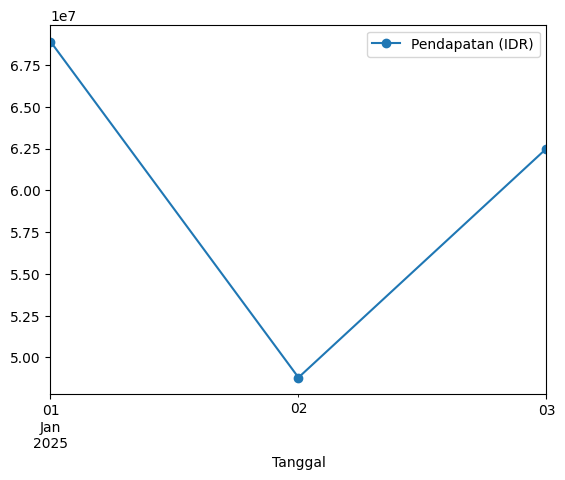

In [9]:
result.plot(kind="line", x="Tanggal", y="Pendapatan (IDR)", marker="o")

plt.show()

## 3. Tampilkan jumlah terjual untuk setiap produk.

In [10]:
result = df.groupby(["Produk"])["Jumlah Terjual"].sum().reset_index()
result

,Produk,Jumlah Terjual
0,Blender,14
1,Laptop,11
2,Mesin Cuci,9
3,Smartphone,22


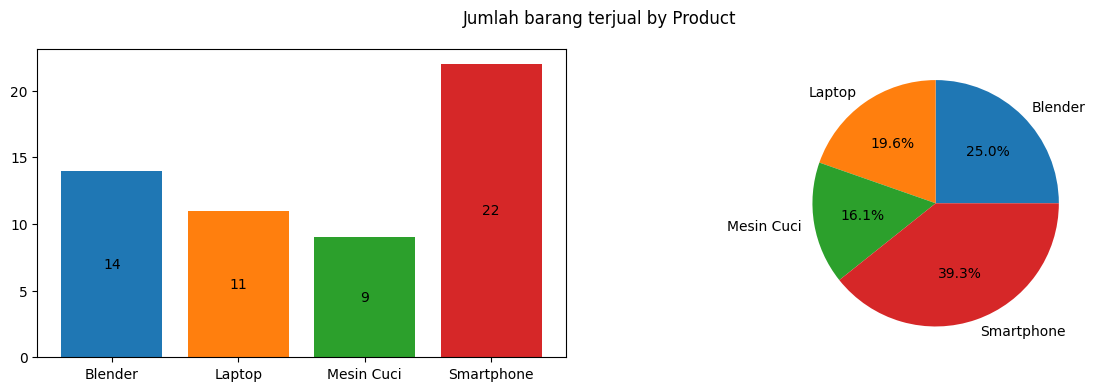

In [12]:
fig,ax = plt.subplots(1,2, figsize=(15,4))
fig.suptitle("Jumlah barang terjual by Product")
bar_colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red']
bar= ax[0].bar(x=result["Produk"], height=result["Jumlah Terjual"], color=bar_colors)
plt.grid()
plt.bar_label(bar, label_type="center")


pie = ax[1].pie(x=result["Jumlah Terjual"], labels= result["Produk"], autopct="%1.1f%%")



plt.show()